<a href="https://colab.research.google.com/github/kapeeshvarma/Book-Recommendation-System/blob/main/Book_Recommendation_System_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**BOOK RECOMMENDATION SYSTEM**

Recommender systems are algorithms aimed at suggesting relevant items to users (movies, books, products). Recommender systems are really critical in some industries as they can generate a huge amount of income when they are efficient or can also be a way to stand out significantly from competitors.

In this project, we create a book recommendation system for users through Unsupervised Machine Learning using three datasets - Books.csv, Users.csv, Ratings.csv

##Importing Data and Modules

In [ ]:
# Import the necessary modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Read in the datasets
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System - Kapeesh Varma/Books.csv')
users = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System - Kapeesh Varma/Users.csv')
ratings = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Book Recommendation System - Kapeesh Varma/Ratings.csv')

##Exploratory Data Analysis and Visualizations

In [ ]:
# Print the head of the Books DataFrame
data = data.iloc[:100000,:]
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [ ]:
# Print a concise summary of the Books DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 100000 non-null  object
 1   Book-Title           100000 non-null  object
 2   Book-Author          100000 non-null  object
 3   Year-Of-Publication  100000 non-null  object
 4   Publisher            100000 non-null  object
 5   Image-URL-S          100000 non-null  object
 6   Image-URL-M          100000 non-null  object
 7   Image-URL-L          100000 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [ ]:
# Print the head of the Users DataFrame
users = users.iloc[:100000,:]
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [ ]:
# Print a concise summary of the Users DataFrame
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   100000 non-null  int64  
 1   Location  100000 non-null  object 
 2   Age       60269 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.3+ MB


In [ ]:
# Print the head of the Ratings DataFrame
ratings = ratings.iloc[:100000,:]
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [ ]:
# Print a concise summary of the Books DataFrame
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 3 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   User-ID      100000 non-null  int64 
 1   ISBN         100000 non-null  object
 2   Book-Rating  100000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.3+ MB


In [ ]:
# Merge Books and Ratings dataframes
data = pd.merge(data,ratings,on='ISBN')

In [ ]:
# Reindex and rename the columns of the DataFrame
data = data.reindex(columns=["ISBN", "User-ID", "Book-Title", "Book-Author", "Year-Of-Publication", "Publisher", "Book-Rating", "Image-URL-S", "Image-URL-M", "Image-URL-L"])
data.rename(columns={"User-ID" : "user_id", 'Book-Title' : 'Title', 'Book-Author' : 'Author', "Book-Rating" : "Rating"}, inplace=True)

In [ ]:
# Print the head of the new dataframe
data = data.iloc[:100000,:]
data.head()

,ISBN,user_id,Title,Author,Year-Of-Publication,Publisher,Rating,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,2,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,0,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,8,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,5,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0002005018,11400,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,0,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
3,0002005018,11676,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
4,0060973129,8,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,0,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


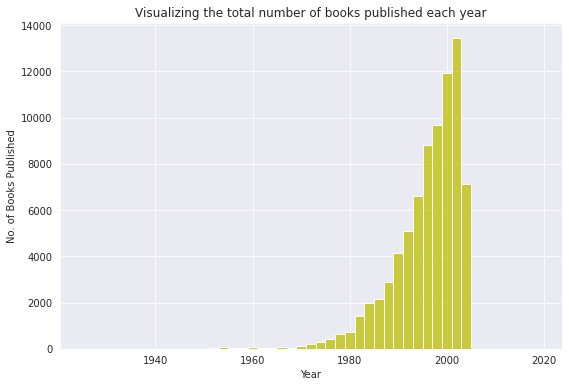

In [ ]:
# Visualize the number of books published each year through histogram
data['Year-Of-Publication'] = data['Year-Of-Publication'].astype('int64')
sns.set_style('darkgrid')
fig, ax =plt.subplots()
fig.set_size_inches(9,6)
a=np.arange(1925,2021,3)
sns.histplot(data['Year-Of-Publication'],bins=np.arange(1925,2021,2),color='y')
plt.ylabel('No. of Books Published')
plt.xlabel('Year')
plt.title('Visualizing the total number of books published each year')
plt.show()

In [ ]:
# Visualize the number of books published each year individaully
data['Year-Of-Publication'].value_counts()

2002    7152
2001    6283
1999    6072
2000    5841
2003    5358
        ... 
1925       1
1945       1
1927       1
1939       1
1938       1
Name: Year-Of-Publication, Length: 78, dtype: int64

In [ ]:
# Visualize the number of books published by each publisher
data['Publisher'].value_counts()

Ballantine Books                2799
Pocket                          2455
Berkley Publishing Group        2214
Warner Books                    1969
Bantam Books                    1828
                                ... 
South Asia Books                   1
Michelin Travel Publications       1
McGraw Hill                        1
Ronsel                             1
McGraw-Hill Education              1
Name: Publisher, Length: 4434, dtype: int64

In [ ]:
# Visualize the mean rating count of the books data
rating_cnt = pd.DataFrame(data.groupby('Title').mean()['Rating'])
rating_cnt = rating_cnt.reset_index()
px.histogram(rating_cnt,x='Rating',marginal='box',nbins=15,width=750,height=500)

In [ ]:
new_data = pd.DataFrame(data.groupby("Title").mean()["Rating"])
new_data['Num_of_ratings'] = pd.DataFrame(data.groupby('Title').count()['Rating'])

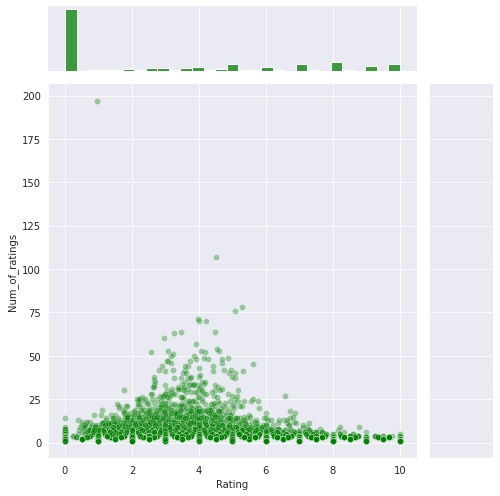

In [ ]:
# Visualize the distribution of ratings
sns.jointplot(x="Rating", y="Num_of_ratings", data=new_data, alpha=0.35,height=7,color='g')
plt.show()

In [ ]:
# Visualizing top 10 books with highest no. of ratings
new_data.sort_values(by=['Num_of_ratings','Rating'],ascending=False).head(10)

,Rating,Num_of_ratings
Title,,
Wild Animus,0.954315,197
The Lovely Bones: A Novel,4.504673,107
The Secret Life of Bees,5.294872,78
The Da Vinci Code,5.078947,76
Life of Pi,3.985915,71
The Nanny Diaries: A Novel,4.214286,70
Divine Secrets of the Ya-Ya Sisterhood: A Novel,4.000000,70
The Red Tent (Bestselling Backlist),4.484375,64
A Painted House,3.468750,64


In [ ]:
# Visualizing top 10 most prolific authors
data.groupby('Author').count().sort_values('Rating',ascending=False)['Title'].head(10)

Author
Stephen King          741
Nora Roberts          508
John Grisham          486
James Patterson       426
Mary Higgins Clark    404
Dean R. Koontz        357
Tom Clancy            309
Danielle Steel        289
Janet Evanovich       285
Sue Grafton           259
Name: Title, dtype: int64

##Data Cleaning & Feature Engineering

In [ ]:
# Create a new DataFrame with average rating of each title and total no. of ratings
new_data = pd.DataFrame(data.groupby("Title").mean()["Rating"])
new_data['Num_of_ratings'] = pd.DataFrame(data.groupby('Title').count()['Rating'])
new_data.head()

,Rating,Num_of_ratings
Title,,
"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",0.0,1
Beyond IBM: Leadership Marketing and Finance for the 1990s,0.0,1
It Takes Two,0.0,1
"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",0.0,1
Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),0.0,1


In [ ]:
# Create a pivot table/crosstab with the DataFrame
data_pivot = data.pivot_table(index="user_id", columns="Title", values="Rating")
data_pivot.head()

Title,"A Light in the Storm: The Civil War Diary of Amelia Martin, Fenwick Island, Delaware, 1861 (Dear America)",Beyond IBM: Leadership Marketing and Finance for the 1990s,It Takes Two,"Little Comic Shop of Horrors (Give Yourself Goosebumps, Book 17)",Murder of a Sleeping Beauty (Scumble River Mysteries (Paperback)),"Q-Space (Star Trek The Next Generation, Book 47)",Tales of Terror and Suspense,$oft Money: The True Power in Our Nation's Capital,"' Sie belieben wohl zu scherzen, Mr. Feynman.'. Abenteuer eines neugierigen Physikers.",' Small g'. Eine Sommeridylle.,'48,'Eine gute Frau hat keinen Kopf'. EuropÃ?Â¤ische SprichwÃ?Â¶rter Ã?Â¼ber Frauen.,'O Au No Keia: Voices from Hawai'I's Mahu and Transgender Communities,'Romance of Paula Vaughn','Salem's Lot,"'Til There Was You (Special Edition, No 576)",(George),"--Olivetti, Moulinex, Chaffoteaux et Maury (Quaderns crema. Narrativa)",...AND THE HORSE HE RODE IN ON : THE PEOPLE V. KENNETH STARR,".Hack: //Legend of the Twilight, Vol. 1",".Hack: //Legend of the Twilight, Vol. 2",".NET Framework Essentials, 3rd Edition",01-01-00: A Novel of the Millennium,01-01-00: The Novel of the Millennium,"1, 2, 3: NURSERY BOARD BOOKS (Nursery Board Books)","1,000 Places to See Before You Die","1,001 Things to Do When There's Nothing to Do","1,001 Ways to Save the Planet","1,003 Great Things About America","1,003 Great Things About Getting Older","1,003 Great Things About Kids","1,401 More Things That P*Ss Me Off",10 Commandments Of Dating,10 Keys for Unlocking the Bible: Treasures That Will Change Your Life,10 Minute Guide to HTML 3.2,10 Minute Guide to Lotus Notes Mail 4.6 (Ten Minute Guide to...),10 Minutes Till Bedtime,10 Natural Laws of Successful Time and Life Management,10 Secrets for Success and Inner Peace,10 critical keys for highly effective Mormon families,...,ZÃ?Â©ro tuÃ?Â©s,"\ Lamb to the Slaughter and Other Stories (Penguin 60s S.)""","\A\"" is for Alibi : A Kinsey Millhone Mystery (A Kinsey Millhone Mystery)""","\And So It Goes\"": Adventures in Television/10113""","\Even Monkeys Fall from Trees\"" and Other Japanese Proverbs""","\God's Grandeur\"" and Other Poems (Dover Thrift Editions)""","\I Remember Laura\"": Laura Ingalls Wilder""","\I Won't Learn from You\"": And Other Thoughts on Creative Maladjustment""","\More More More,\"" Said the Baby""","\O\"" Is for Outlaw""","\Once More, With Feeling\"" : The Script Book""","\Slick Willie\"": Why America Cannot Trust Bill Clinton""","\Surely You're Joking, Mr. Feynman!\"": Adventures of a Curious Character""","\The Happy Prince\"" and Other Stories (Penguin Popular Classics)""","\The Times\"" Second Tournament of the Mind""","\The Times\"" Tournament of the Mind""","\The Twilight of the Idols (Classics S.)""","\Toward full communion\"" and \""Concordat of agreement\""""","\Treasure Island\"": According to Spike Milligan""","\Well, there's your problem\"": Cartoons""","\What Do You Care What Other People Think?\"": Further Adventures of a Curious Character""","aol.com: How Steve Case Beat Bill Gates, Nailed the Netheads, and Made Millions in the War for the Web","buongiorno!, Tl.1, Lehrbuch, Italienisch fÃ?Â¼r AnfÃ?Â¤nger",de Amor y de Sombra - Bolsillo,de Parte de La Princesa Muerta,e,eCFO: Sustaining Value in The New Corporation,eXistenZ: A Novelization,iI Paradiso Degli Orchi,"metamorfosis, La (ClÃ¡sicos selecciÃ³n series)",seaQuest 2,stardust,the Heiress Bride (sister brides),"wet sand, raven tracks",why I'm like this : True Stories,"Â¡Corre, perro, corre!",Â¿QuiÃ©n se ha llevado mi queso?,"Â¿QuÃ© me quieres, amor?",Ã?Â?ber die Freiheit.,Ã?Â?bermorgen.
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## Generating Recommendations

In [ ]:
# Recommending top 10 books correlated with 'The Da Vinci Code'
da_vinci = pd.DataFrame(data_pivot.corrwith(data_pivot['The Da Vinci Code']),columns=['Correlation'])
da_vinci.dropna(inplace=True)
recom = da_vinci.join(new_data['Num_of_ratings'])
recom = recom.reset_index()
recom[recom.Num_of_ratings>40].sort_values(by=['Correlation','Num_of_ratings'],ascending=False).head(10)

,Title,Correlation,Num_of_ratings
1306,The Da Vinci Code,1.000000,76
1261,The Brethren,1.000000,47
1606,The Summons,0.845626,42
1286,The Client,0.739153,51
1519,The Pelican Brief,0.702524,60
1498,The Nanny Diaries: A Novel,0.633792,70
605,Harry Potter and the Sorcerer's Stone (Harry P...,0.575758,53
1692,Timeline,0.519361,44
640,House of Sand and Fog,0.505445,53
1619,The Testament,0.495832,52


In [ ]:
# Recommending top 10 books correlated with 'Life of Pi'
life = pd.DataFrame(data_pivot.corrwith(data_pivot['Life of Pi']),columns=['Correlation'])
life.dropna(inplace=True)
recom2 = life.join(new_data['Num_of_ratings'])
recom2 = recom2.reset_index()
recom2[recom2.Num_of_ratings>40].sort_values(by=['Correlation','Num_of_ratings'],ascending=False).head(10)

,Title,Correlation,Num_of_ratings
731,Life of Pi,1.000000,71
1225,The Brethren,1.000000,47
1218,The Bonesetter's Daughter,1.000000,42
571,Harry Potter and the Sorcerer's Stone (Harry P...,0.987878,53
1059,She's Come Undone (Oprah's Book Club (Paperback)),0.925641,42
1060,She's Come Undone (Oprah's Book Club),0.800641,42
1256,The Client,0.726184,51
1149,Summer Sisters,0.705996,52
567,Harry Potter and the Chamber of Secrets (Book 2),0.583695,48
1501,The Secret Life of Bees,0.559739,78


In [ ]:
# Recommending top 10 books correlated with 'The Secret Life of Bees'
secret = pd.DataFrame(data_pivot.corrwith(data_pivot['The Secret Life of Bees']),columns=['Correlation'])
secret.dropna(inplace=True)
recom3 = secret.join(new_data['Num_of_ratings'])
recom3 = recom3.reset_index()
recom3[recom3.Num_of_ratings>40].sort_values(by=['Correlation','Num_of_ratings'],ascending=False).head(10)

,Title,Correlation,Num_of_ratings
1904,The Secret Life of Bees,1.000000,78
1935,The Summons,0.906217,42
1326,She's Come Undone (Oprah's Book Club),0.607815,42
910,Life of Pi,0.559739,71
2030,Timeline,0.461361,44
2155,White Oleander : A Novel,0.444252,53
1643,The Five People You Meet in Heaven,0.371427,41
713,Harry Potter and the Sorcerer's Stone (Harry P...,0.349561,53
1848,The Pilot's Wife : A Novel,0.347149,48
1725,The Joy Luck Club,0.303152,50


##Conclusion

The following observations and conclusions have been made through various analysis and visualizations performed in this project:

1.   **The top 3 most prolific authors are Stephen King, Nora Roberts and John Grisham.**

2.   **The most popular novels/books are The Secret Life of Bees, The Da Vinci Code and The Lovely Bones.**

1.   **The Year in which highest number of book have been published is 2002 and the Publisher with highest number of publications is "Ballantine Books".**

1.   **The Recommendation system has been implemented using Collaborative filtering and correlation property on unlabeled data. The top 10 most relevant and correlated books can be recommended for any given book in the data using this function. Clustering doesn't help much in  this project and hence has not been used.**